In [222]:
import pandas as pd
import numpy as np
import requests
import psycopg2
import json
import calendar
import time
import re
import matplotlib.pyplot as plt
import decimal

import boto3
import base64
from botocore.exceptions import ClientError

In [190]:
def get_secret():

    secret_name = "CCC_DB"
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    # In this sample we only handle the specific exceptions for the 'GetSecretValue' API.
    # See https://docs.aws.amazon.com/secretsmanager/latest/apireference/API_GetSecretValue.html
    # We rethrow the exception by default.

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        if e.response['Error']['Code'] == 'DecryptionFailureException':
            # Secrets Manager can't decrypt the protected secret text using the provided KMS key.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InternalServiceErrorException':
            # An error occurred on the server side.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InvalidParameterException':
            # You provided an invalid value for a parameter.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InvalidRequestException':
            # You provided a parameter value that is not valid for the current state of the resource.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'ResourceNotFoundException':
            # We can't find the resource that you asked for.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
    else:
        # Decrypts secret using the associated KMS CMK.
        # Depending on whether the secret is a string or binary, one of these fields will be populated.
        if 'SecretString' in get_secret_value_response:
            secret = get_secret_value_response['SecretString']
        else:
            decoded_binary_secret = base64.b64decode(get_secret_value_response['SecretBinary'])
            
    return(secret)

In [191]:
def get_key():

    secret_name = "CCC_API"
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    # In this sample we only handle the specific exceptions for the 'GetSecretValue' API.
    # See https://docs.aws.amazon.com/secretsmanager/latest/apireference/API_GetSecretValue.html
    # We rethrow the exception by default.

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        if e.response['Error']['Code'] == 'DecryptionFailureException':
            # Secrets Manager can't decrypt the protected secret text using the provided KMS key.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InternalServiceErrorException':
            # An error occurred on the server side.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InvalidParameterException':
            # You provided an invalid value for a parameter.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'InvalidRequestException':
            # You provided a parameter value that is not valid for the current state of the resource.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
        elif e.response['Error']['Code'] == 'ResourceNotFoundException':
            # We can't find the resource that you asked for.
            # Deal with the exception here, and/or rethrow at your discretion.
            raise e
    else:
        # Decrypts secret using the associated KMS CMK.
        # Depending on whether the secret is a string or binary, one of these fields will be populated.
        if 'SecretString' in get_secret_value_response:
            secret = get_secret_value_response['SecretString']
        else:
            decoded_binary_secret = base64.b64decode(get_secret_value_response['SecretBinary'])
            
    return(secret)

In [192]:
api_key = json.loads(get_key())['CCC_API']

In [193]:
secret = json.loads(get_secret())

engine = psycopg2.connect(
    database=secret["dbname"],
    user=secret["username"],
    password=secret["password"],
    host=secret["host"],
    port=secret["port"]
)

In [194]:
cur = engine.cursor()

print(cur.execute("select * from information_schema.tables"))

None


In [195]:
s3 = boto3.client('s3')

In [196]:
with open('target.csv', 'wb') as data:
    s3.download_fileobj('ccc-waxler', 'consolidated_coin_data.csv', data)

In [197]:
df = pd.read_csv('target.csv')

In [198]:
df.head()

Currency          Date      Open      High       Low     Close  \
0   ripple  Apr 24, 2019  0.321114  0.321282  0.296982  0.302318   
1   ripple  Apr 23, 2019  0.323844  0.328396  0.320919  0.321222   
2   ripple  Apr 22, 2019  0.322277  0.329350  0.320237  0.323934   
3   ripple  Apr 21, 2019  0.328678  0.329627  0.318746  0.322449   
4   ripple  Apr 20, 2019  0.331871  0.333213  0.324969  0.328476   

          Volume      Market Cap  
0  1,517,791,002  12,698,877,293  
1  1,077,333,990  13,492,933,875  
2  1,131,094,080  13,606,823,301  
3  1,005,803,846  13,533,407,430  
4    931,570,799  13,786,384,592

In [199]:
df['Currency'].value_counts()

litecoin        2188
bitcoin         2188
ripple          2090
stellar         1724
tether          1515
ethereum        1357
eos              663
bitcoin-cash     641
binance-coin     639
cardano          571
Name: Currency, dtype: int64

In [200]:
df.loc[df['Currency'] == 'ethereum']

Currency          Date        Open        High         Low       Close  \
11648  ethereum  Apr 24, 2019  171.350000  171.570000  161.980000  165.830000   
11649  ethereum  Apr 23, 2019  172.010000  176.850000  170.900000  171.450000   
11650  ethereum  Apr 22, 2019  170.020000  173.070000  168.730000  171.870000   
11651  ethereum  Apr 21, 2019  173.720000  174.420000  167.430000  170.050000   
11652  ethereum  Apr 20, 2019  173.720000  176.710000  171.790000  173.750000   
...         ...           ...         ...         ...         ...         ...   
13000  ethereum  Aug 11, 2015    0.708087    1.130000    0.663235    1.070000   
13001  ethereum  Aug 10, 2015    0.713989    0.729854    0.636546    0.708448   
13002  ethereum  Aug 09, 2015    0.706136    0.879810    0.629191    0.701897   
13003  ethereum  Aug 08, 2015    2.790000    2.800000    0.714725    0.753325   
13004  ethereum  Aug 07, 2015    2.830000    3.540000    2.520000    2.770000   

              Volume      Market Cap  
11648  7,351,304,156  17,544,029,659  
11649  7,097,827,092  18,136,462,572  
11650  6,094,878,077  18,179,292,263  
11651  6,005,571,688  17,983,602,095  
11652  6,142,567,812  18,373,023,202  
...              ...             ...  
13000      1,463,100      64,569,288  
13001        405,283      42,818,364  
13002        532,170      42,399,573  
13003        674,188      45,486,894  
13004        164,329     166,610,555  

[1357 rows x 8 columns]

In [201]:
df['UnixDate'] = ""

In [202]:
df.head()

Currency          Date      Open      High       Low     Close  \
0   ripple  Apr 24, 2019  0.321114  0.321282  0.296982  0.302318   
1   ripple  Apr 23, 2019  0.323844  0.328396  0.320919  0.321222   
2   ripple  Apr 22, 2019  0.322277  0.329350  0.320237  0.323934   
3   ripple  Apr 21, 2019  0.328678  0.329627  0.318746  0.322449   
4   ripple  Apr 20, 2019  0.331871  0.333213  0.324969  0.328476   

          Volume      Market Cap UnixDate  
0  1,517,791,002  12,698,877,293           
1  1,077,333,990  13,492,933,875           
2  1,131,094,080  13,606,823,301           
3  1,005,803,846  13,533,407,430           
4    931,570,799  13,786,384,592

In [203]:
df['UnixDate'] = df['Date'].apply(lambda x : calendar.timegm(time.strptime(x, '%b %d, %Y')))

In [204]:
df.head(50)

Currency          Date      Open      High       Low     Close  \
0    ripple  Apr 24, 2019  0.321114  0.321282  0.296982  0.302318   
1    ripple  Apr 23, 2019  0.323844  0.328396  0.320919  0.321222   
2    ripple  Apr 22, 2019  0.322277  0.329350  0.320237  0.323934   
3    ripple  Apr 21, 2019  0.328678  0.329627  0.318746  0.322449   
4    ripple  Apr 20, 2019  0.331871  0.333213  0.324969  0.328476   
5    ripple  Apr 19, 2019  0.337062  0.337147  0.329577  0.331902   
6    ripple  Apr 18, 2019  0.335476  0.345289  0.335335  0.337065   
7    ripple  Apr 17, 2019  0.327157  0.340327  0.322388  0.335453   
8    ripple  Apr 16, 2019  0.320998  0.327308  0.319261  0.327218   
9    ripple  Apr 15, 2019  0.328841  0.331551  0.318090  0.320913   
10   ripple  Apr 14, 2019  0.326160  0.329421  0.324244  0.328809   
11   ripple  Apr 13, 2019  0.326386  0.334444  0.323714  0.326031   
12   ripple  Apr 12, 2019  0.330664  0.330868  0.321167  0.326346   
13   ripple  Apr 11, 2019  0.354828  0.354851  0.326826  0.330984   
14   ripple  Apr 10, 2019  0.349425  0.359778  0.348709  0.354792   
15   ripple  Apr 09, 2019  0.358307  0.358307  0.348536  0.349462   
16   ripple  Apr 08, 2019  0.361143  0.367036  0.351588  0.358234   
17   ripple  Apr 07, 2019  0.354406  0.365387  0.351689  0.359856   
18   ripple  Apr 06, 2019  0.361837  0.363441  0.351168  0.354405   
19   ripple  Apr 05, 2019  0.332685  0.374064  0.332630  0.361803   
20   ripple  Apr 04, 2019  0.342286  0.348977  0.329070  0.332513   
21   ripple  Apr 03, 2019  0.351309  0.371270  0.333735  0.342234   
22   ripple  Apr 02, 2019  0.312805  0.355870  0.312001  0.351499   
23   ripple  Apr 01, 2019  0.309195  0.313777  0.308910  0.312747   
24   ripple  Mar 31, 2019  0.310730  0.311171  0.308150  0.309229   
25   ripple  Mar 30, 2019  0.307655  0.326784  0.306873  0.310632   
26   ripple  Mar 29, 2019  0.309269  0.311644  0.306235  0.307929   
27   ripple  Mar 28, 2019  0.312383  0.312452  0.307085  0.309246   
28   ripple  Mar 27, 2019  0.305421  0.312615  0.304067  0.312465   
29   ripple  Mar 26, 2019  0.303808  0.305060  0.298987  0.305060   
30   ripple  Mar 25, 2019  0.309446  0.309736  0.301453  0.304055   
31   ripple  Mar 24, 2019  0.312396  0.312453  0.308168  0.308992   
32   ripple  Mar 23, 2019  0.311343  0.313666  0.310130  0.312359   
33   ripple  Mar 22, 2019  0.311342  0.315092  0.310141  0.311541   
34   ripple  Mar 21, 2019  0.319960  0.320850  0.309338  0.312718   
35   ripple  Mar 20, 2019  0.319346  0.320777  0.314781  0.319610   
36   ripple  Mar 19, 2019  0.316756  0.320595  0.315351  0.319281   
37   ripple  Mar 18, 2019  0.317716  0.320667  0.314653  0.317440   
38   ripple  Mar 17, 2019  0.320387  0.320739  0.316497  0.317612   
39   ripple  Mar 16, 2019  0.315066  0.322413  0.314838  0.320468   
40   ripple  Mar 15, 2019  0.312733  0.316065  0.311575  0.315052   
41   ripple  Mar 14, 2019  0.313870  0.316362  0.311307  0.312955   
42   ripple  Mar 13, 2019  0.310611  0.320114  0.308660  0.314098   
43   ripple  Mar 12, 2019  0.311138  0.311773  0.307536  0.310201   
44   ripple  Mar 11, 2019  0.313175  0.314576  0.309417  0.311065   
45   ripple  Mar 10, 2019  0.314266  0.315795  0.311095  0.313107   
46   ripple  Mar 09, 2019  0.309751  0.317748  0.309367  0.313826   
47   ripple  Mar 08, 2019  0.315044  0.316385  0.308828  0.310087   
48   ripple  Mar 07, 2019  0.317192  0.319898  0.314548  0.314766   
49   ripple  Mar 06, 2019  0.316674  0.320833  0.311987  0.317031   

           Volume      Market Cap    UnixDate  
0   1,517,791,002  12,698,877,293  1556064000  
1   1,077,333,990  13,492,933,875  1555977600  
2   1,131,094,080  13,606,823,301  1555891200  
3   1,005,803,846  13,533,407,430  1555804800  
4     931,570,799  13,786,384,592  1555718400  
5   1,025,167,554  13,930,181,415  1555632000  
6   1,092,731,769  14,146,855,828  1555545600  
7   1,137,811,633  14,079,207,980  1555459200  
8     799,796,781  13,733,570,917  1555372800  
9  

In [205]:
df.groupby(df['Currency'])['UnixDate'].min().sort_values()

Currency
bitcoin         1367107200
litecoin        1367107200
ripple          1375574400
stellar         1407196800
tether          1424822400
ethereum        1438905600
eos             1498867200
bitcoin-cash    1500768000
binance-coin    1500940800
cardano         1506816000
Name: UnixDate, dtype: int64

In [206]:
#df_focus = df.loc[df['Currency'].isin(['ethereum','tether','stellar','ripple','litecoin','bitcoin'])]

In [207]:
df_focus = df.loc[df['Currency'].isin(['ethereum','ripple','litecoin','bitcoin'])]

In [208]:
df_focus = df_focus.loc[df_focus['UnixDate'] > 1438905600]

In [209]:
df_focus.head()

Currency          Date      Open      High       Low     Close  \
0   ripple  Apr 24, 2019  0.321114  0.321282  0.296982  0.302318   
1   ripple  Apr 23, 2019  0.323844  0.328396  0.320919  0.321222   
2   ripple  Apr 22, 2019  0.322277  0.329350  0.320237  0.323934   
3   ripple  Apr 21, 2019  0.328678  0.329627  0.318746  0.322449   
4   ripple  Apr 20, 2019  0.331871  0.333213  0.324969  0.328476   

          Volume      Market Cap    UnixDate  
0  1,517,791,002  12,698,877,293  1556064000  
1  1,077,333,990  13,492,933,875  1555977600  
2  1,131,094,080  13,606,823,301  1555891200  
3  1,005,803,846  13,533,407,430  1555804800  
4    931,570,799  13,786,384,592  1555718400

In [210]:
df_focus['Currency'].value_counts()

ethereum    1356
litecoin    1356
bitcoin     1356
ripple      1356
Name: Currency, dtype: int64

In [211]:
df_pivot = pd.pivot_table(df_focus, index=['UnixDate','Date'], values='High',columns='Currency')

In [212]:
df_pivot.count()

Currency
bitcoin     1356
ethereum    1356
litecoin    1356
ripple      1356
dtype: int64

In [213]:
df_rec = df_pivot.loc[df_pivot.index.get_level_values(level = 'UnixDate') >= 1490832000] 

In [214]:
df_norm = ((df_rec-df_rec.min())/(df_rec.max()-df_rec.min()))*10

In [215]:
df_norm.head()

Currency                  bitcoin  ethereum  litecoin    ripple
UnixDate   Date                                                
1490832000 Mar 30, 2017  0.000000  0.066746  0.001629  0.000000
1490918400 Mar 31, 2017  0.013461  0.055658  0.002444  0.019995
1491004800 Apr 01, 2017  0.022285  0.056810  0.000000  0.022667
1491091200 Apr 02, 2017  0.030620  0.052058  0.026065  0.149809
1491177600 Apr 03, 2017  0.053809  0.034417  0.045071  0.124071

<Figure size 432x288 with 0 Axes>

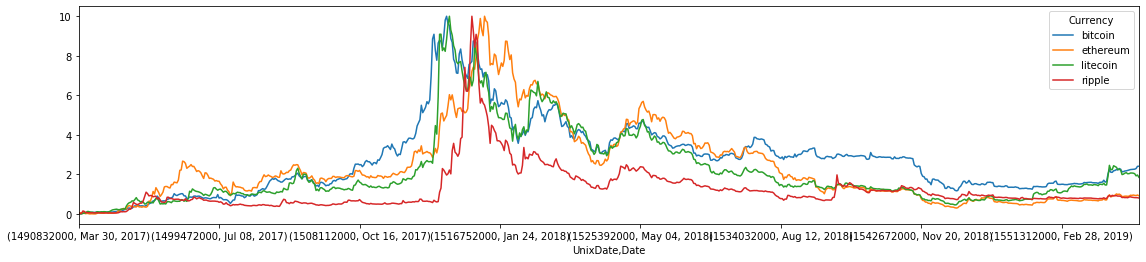

In [216]:
plt.figure()

df_norm.plot(figsize=(19,4))

In [242]:
dynamodb = boto3.resource('dynamodb', region_name='us-east-1', endpoint_url="https://dynamodb.us-east-1.amazonaws.com/")
table = dynamodb.Table('CCC-Norm')

In [243]:
class DecimalEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            if abs(o) % 1 > 0:
                return float(o)
            else:
                return int(o)
        return super(DecimalEncoder, self).default(o)

In [281]:
for index, row in df_focus.iterrows():
    print(row['Volume'])
    print(type(row['Market Cap']))
    response = table.put_item(
       Item={
            'Currency': row['Currency'],
            'UnixDate': row['UnixDate'],
            'Date': row['Date'],
            'High': round(decimal.Decimal(row['High']),4),
            'Low': round(decimal.Decimal(row['Low']),4),
            'MarketCap': int(row['Market Cap'].replace(',' , '')),
            'Volume': int(row['Volume'].replace(',' , ''))
        }
    )
    print(json.dumps(response, indent=4, cls=DecimalEncoder))

1,517,791,002
<class 'str'>
{
    "ResponseMetadata": {
        "RequestId": "HTFEEDCB2T2DB03TG0ST699J5NVV4KQNSO5AEMVJF66Q9ASUAAJG",
        "HTTPStatusCode": 200,
        "HTTPHeaders": {
            "server": "Server",
            "date": "Sun, 28 Jul 2019 17:22:44 GMT",
            "content-type": "application/x-amz-json-1.0",
            "content-length": "2",
            "connection": "keep-alive",
            "x-amzn-requestid": "HTFEEDCB2T2DB03TG0ST699J5NVV4KQNSO5AEMVJF66Q9ASUAAJG",
            "x-amz-crc32": "2745614147"
        },
        "RetryAttempts": 0
    }
}
1,077,333,990
<class 'str'>
{
    "ResponseMetadata": {
        "RequestId": "D8SDPSVRPF37VUVJCVT1J3599BVV4KQNSO5AEMVJF66Q9ASUAAJG",
        "HTTPStatusCode": 200,
        "HTTPHeaders": {
            "server": "Server",
            "date": "Sun, 28 Jul 2019 17:22:44 GMT",
            "content-type": "application/x-amz-json-1.0",
            "content-length": "2",
            "connection": "keep-alive",
            